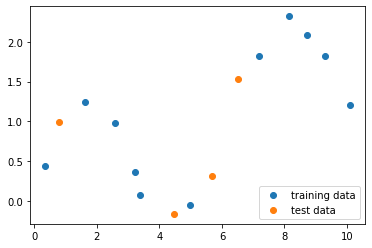

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
def part1_scatter():
    import matplotlib.pyplot as plt
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
part1_scatter()


In [2]:
print("x shape {} - y shape {}".format(x.shape, y.shape))
print("xtrain shape {} - ytrain shape {}".format(X_train.shape, y_train.shape))
print("xtest shape {} - ytest shape {}".format(X_test.shape, y_test.shape))

x shape (15,) - y shape (15,)
xtrain shape (11,) - ytrain shape (11,)
xtest shape (4,) - ytest shape (4,)


In [3]:
print(X_test)
print(y_test)
print(X_train)
print(y_train)

[0.79431716 4.47573197 5.69364194 6.51069113]
[ 0.99517935 -0.16081     0.3187423   1.53763897]
[10.08877265  3.23065446  1.62431903  9.31004929  7.17166586  4.96972856
  8.14799756  2.59103578  0.35281047  3.375973    8.72363612]
[ 1.21213026  0.36408873  1.24877201  1.81942995  1.82595557 -0.05233879
  2.31966323  0.98630796  0.43770571  0.07512287  2.08031157]


In [4]:
X_train_new = X_train.reshape(-1, 1)
print(X_train_new.shape)

(11, 1)


In [5]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    degrees = [1, 3, 6, 9]
    def poly_regression(i):
        poly = PolynomialFeatures(degree = i)
        x_poly = poly.fit_transform(X_train_new)
        linreg = LinearRegression().fit(x_poly, y_train)
        y_pred = linreg.predict(poly.fit_transform(np.linspace(0, 10, 100).reshape(-1, 1)))
        return(y_pred.reshape(-1, 1))
    ans = np.hstack([poly_regression(deg) for deg in degrees]).T
    return ans

In [14]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)
#plot_one(answer_one())

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score        #Updated api
r2_train = np.zeros(10)
r2_test = np.zeros(10)
for i in range(10):
    poly = PolynomialFeatures(degree = i)
    #Train and score x_train
    x_poly = poly.fit_transform(X_train.reshape(11, 1))
    linreg = LinearRegression().fit(x_poly, y_train)
    r2_train[i] = linreg.score(x_poly, y_train)
    #Test and score x_test
    x_poly_2 = poly.fit_transform(X_test.reshape(4, 1))
    r2_test[i] = linreg.score(x_poly_2, y_test)
#return (r2_train, r2_test)
print(r2_train)
print(r2_test)

[0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706]
[-0.47808642 -0.45237104 -0.06856984  0.00533105  0.73004943  0.87708301
  0.9214094   0.92021504  0.6324794  -0.64525576]


In [8]:
r2_score = (r2_train, r2_test)
r2_score

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324794 , -0.64525576]))

In [9]:
data = pd.DataFrame({'training_score': r2_score[0], 'test_score': r2_score[1]})
data['difference'] = data['training_score'] - data['test_score']
data = data.sort_values(by=['difference'])
good_value = data.index[0]
data = data.sort_values(by=['difference'], ascending=False)
overfitting = data.index[0]
data = data.sort_values(by=['training_score'])
underfitting = data.index[0]
final = (underfitting, overfitting, good_value)
final

(0, 9, 6)

In [10]:
print(X_train.shape)
print(X_test.shape)

(11,)
(4,)


### Train Lasso with polynomial degree and make R2 comparison

In [11]:
poly = PolynomialFeatures(degree = 12)
x_train_poly = poly.fit_transform(X_train.reshape(11, 1))
x_test_poly = poly.fit_transform(X_test.reshape(4, 1))
linreg_poly = LinearRegression().fit(x_train_poly, y_train)

In [12]:
lin_r2_test = linreg_poly.score(x_test_poly, y_test)
lin_r2_test

-4.311992550801969

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=10000).fit(x_train_poly, y_train)
las_r2_test = lasso.score(x_test_poly, y_test)
las_r2_test

C:\Users\SYED\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


0.8406625614750236

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)
X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)
X_subset = X_test2
y_subset = y_test2


In [19]:
print(X_mush.shape)
print(y_mush)

(8124, 117)
0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class_p, Length: 8124, dtype: uint8
